#### B1. Implement a Hidden Markov Model (HMM) to recognize the sequence of weather patterns (e.g., sunny, cloudy, rainy) based on temperature and humidity observations. Use both discrete and continuous HMMs to compare their performance. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
states = ["Sunny", "Cloudy", "Rainy"]
n_states = len(states)

In [3]:
means = np.array([
    [30, 40],  
    [25, 60],  
    [20, 80]   
])

covars = np.array([
    [[5, 0], [0, 5]],  
    [[4, 0], [0, 4]],   
    [[3, 0], [0, 3]]    
])

In [4]:
np.random.seed(42)
n_samples = 300
hidden_states = np.random.choice(n_states, size=n_samples, p=[0.5, 0.3, 0.2])

observations = np.array([
    np.random.multivariate_normal(means[state], covars[state])
    for state in hidden_states
])

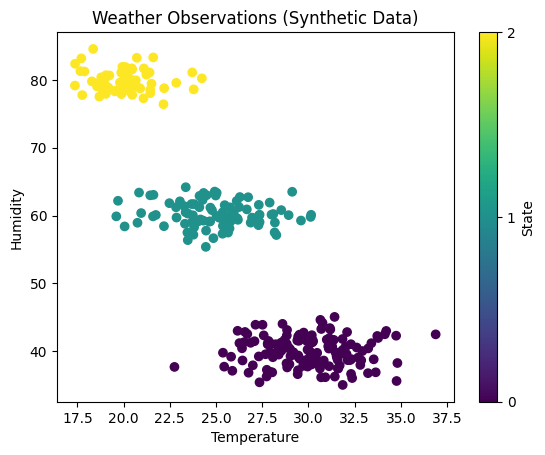

In [5]:
plt.scatter(observations[:, 0], observations[:, 1], c=hidden_states, cmap='viridis')
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Weather Observations (Synthetic Data)")
plt.colorbar(ticks=[0, 1, 2], label='State')
plt.show()

In [6]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(observations).astype(int)

In [7]:

X_discrete_seq = X_discrete[:, 0].reshape(-1, 1)
hmm_discrete = hmm.CategoricalHMM(n_components=n_states, n_iter=100)
hmm_discrete.fit(X_discrete_seq)
hidden_preds_discrete = hmm_discrete.predict(X_discrete_seq)

In [8]:
accuracy_discrete = np.mean(hidden_preds_discrete == hidden_states)
print(f"Discrete HMM Accuracy: {accuracy_discrete:.2f}")

Discrete HMM Accuracy: 0.33


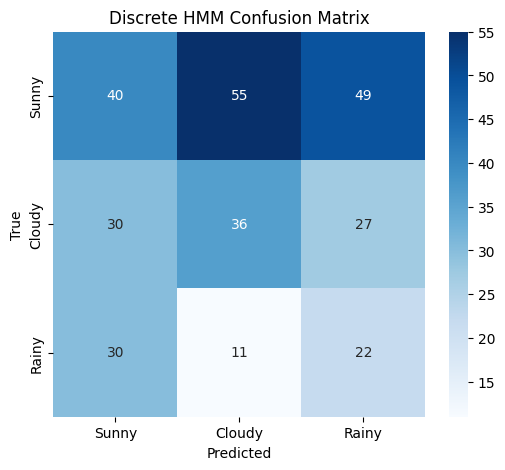

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(hidden_states, hidden_preds_discrete),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=states, yticklabels=states)
plt.title("Discrete HMM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [10]:
hmm_continuous = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
hmm_continuous.fit(observations)
hidden_preds_continuous = hmm_continuous.predict(observations)

In [11]:
accuracy_continuous = np.mean(hidden_preds_continuous == hidden_states)
print(f"Continuous HMM Accuracy: {accuracy_continuous:.2f}")

Continuous HMM Accuracy: 0.11


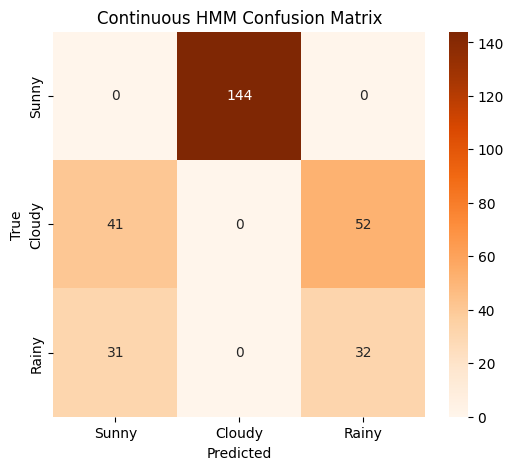

In [12]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(hidden_states, hidden_preds_continuous),
            annot=True, fmt='d', cmap='Oranges',
            xticklabels=states, yticklabels=states)
plt.title("Continuous HMM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

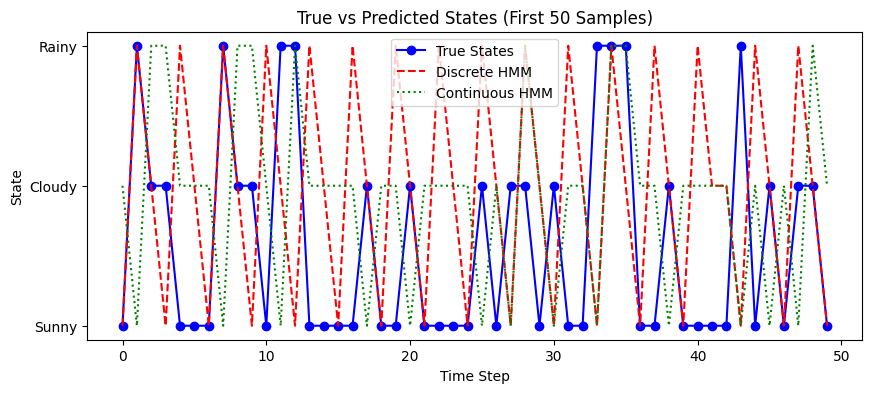

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(hidden_states[:50], 'bo-', label="True States")
plt.plot(hidden_preds_discrete[:50], 'r--', label="Discrete HMM")
plt.plot(hidden_preds_continuous[:50], 'g:', label="Continuous HMM")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("State")
plt.title("True vs Predicted States (First 50 Samples)")
plt.yticks([0, 1, 2], states)
plt.show()

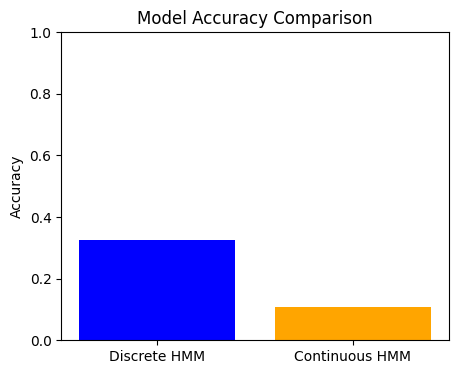

In [14]:
plt.figure(figsize=(5, 4))
plt.bar(['Discrete HMM', 'Continuous HMM'], [accuracy_discrete, accuracy_continuous],
        color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()